In [1]:
import numpy as np

from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

import sys

In [2]:
def create_data(save_to_file_basename: str = None):
    slope = -1
    intersect = 12

    n = 100
    x = list()
    y = list()

    if save_to_file_basename is not None:
        param_file = f"{save_to_file_basename}_params.txt"
        try:
            f_param = open(param_file, "w")
        except IOError as err:
            print(f"Could not open `{param_file}`: {err}", file=sys.stderr)
            return [], []

    for i, v in enumerate(range(0, 41, 10)):
        slope_loc = slope + np.random.normal(0, 0.1)
        intersect_loc = intersect + v + np.random.normal(0, 0.1)

        if save_to_file_basename is not None:
            print(f"{i}: slope     = {slope_loc}", file=f_param)
            print(f"{i}: intersect = {intersect_loc}", file=f_param)

        x_loc = np.linspace(0.0 + 0.25 * v, 10.0 + 0.25 * v, n)
        y_loc = slope_loc * x_loc + intersect_loc + np.random.normal(0.0, 0.5, n)

        x.extend(x_loc)
        y.extend(y_loc)

    if save_to_file_basename is not None:
        f_param.close()
        print(f"[INFO] Saved parameters to `{param_file}`")

    if save_to_file_basename is not None:
        data_file = f"{save_to_file_basename}_data.txt"
        try:
            with open(data_file, "w") as f_data:
                for xi in x:
                    print(xi, end=' ', file=f_data)
                print(file=f_data)
                for yi in y:
                    print(yi, end=' ', file=f_data)
                print(file=f_data)
        except IOError as err:
            print(f"Could not open `{data_file}`: {err}", file=sys.stderr)
            return [], []
    
    if save_to_file_basename is not None:
        print(f"[INFO] Saved data to `{data_file}`")

    return x, y

In [3]:
# x, y = create_data("data/simpson/test")
x, y = create_data()

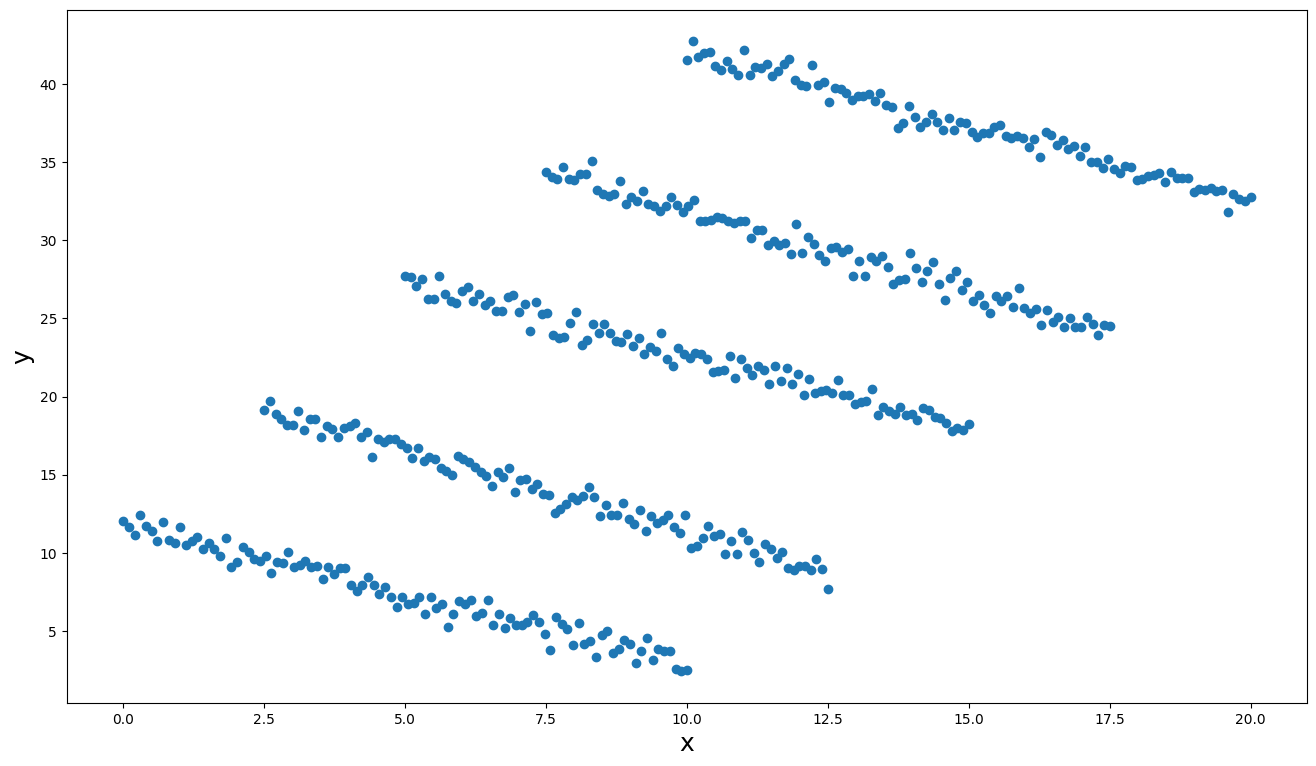

In [4]:
plt.figure(figsize=(16, 9))

plt.scatter(x, y)

plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.show()

In [5]:
lr = LinearRegression().fit(np.array(x).reshape(-1, 1), y)

lr_slope = lr.coef_[0]
lr_intercept = lr.intercept_

print(f"{lr_slope     = }")
print(f"{lr_intercept = }")

lr_slope     = 1.397539222266859
lr_intercept = 8.147479933806645


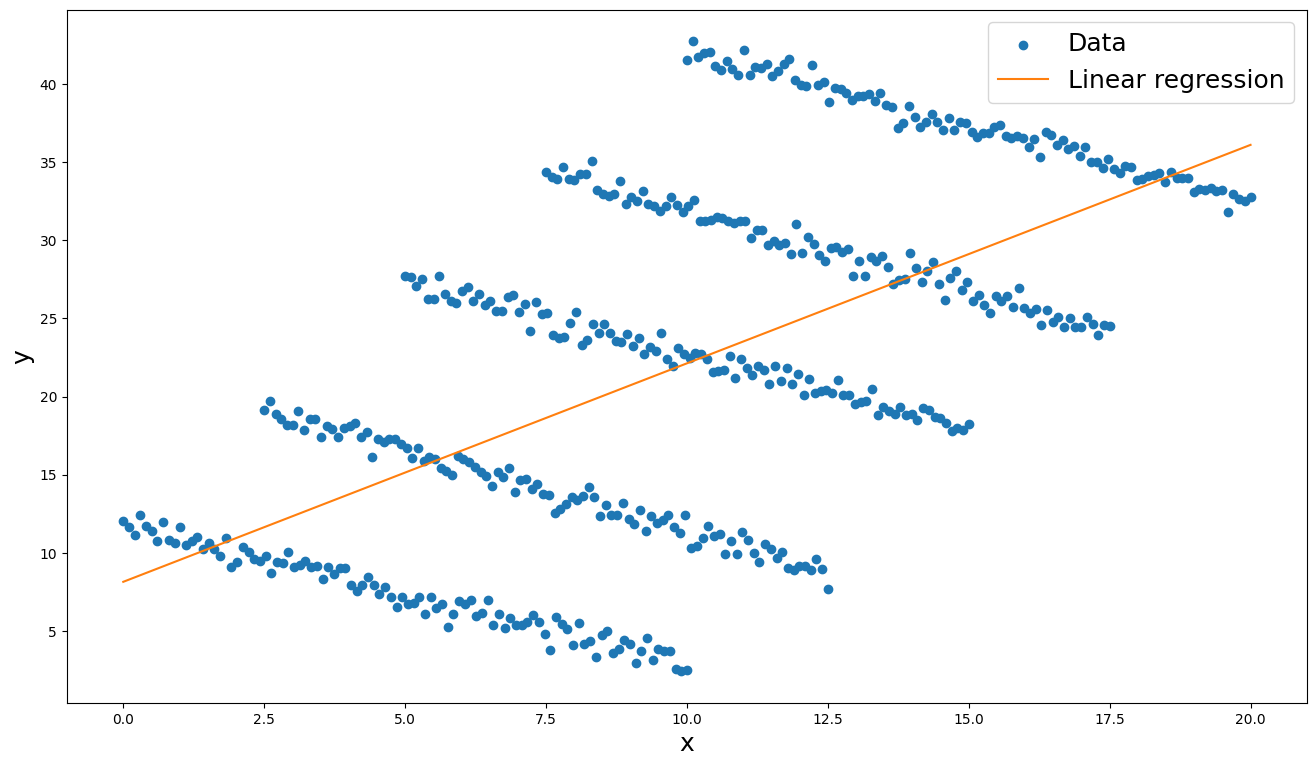

In [6]:
plt.figure(figsize=(16, 9))

plt.scatter(x, y, label="Data")

x_ = np.linspace(np.min(x), np.max(x), 1000)
y_ = lr_slope * x_ + lr_intercept
plt.plot(x_, y_, label="Linear regression", color="tab:orange")

plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.legend(fontsize=18)

plt.show()